In [22]:
%matplotlib inline

Regularized Regression

> Tip: This avoids overfitting

* Ridge regression with OLS loss function - penalize large positive or negative coefficients - like picking `k` in KNN a hyperparameter (`⍺ == 0` can lead to overfitting, high `⍺` can lead to underfitting)

In [23]:
from sklearn.datasets import load_iris
iris = load_iris()

import pandas as pd

df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df['target'] = iris.target

In [24]:
from sklearn.model_selection import train_test_split

X = df.drop('target', axis=1).values
y = df['target'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [25]:

from sklearn.linear_model import Ridge
scores = []
for alpha in [0.1, 1.0, 10.0, 100.0, 1000.0]:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    scores.append(ridge.score(X_test, y_test))

print(scores)

[0.914045020678652, 0.9139379584903491, 0.9067822909067073, 0.8644314152718987, 0.49196162791066]


Lasso Regression

In [26]:

from sklearn.linear_model import Lasso
scores = []
for alpha in [0.01, 1.0, 10.0, 20.0, 50.0]:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train, y_train)
    scores.append(lasso.score(X_test, y_test))

print(scores)

[0.9107974813946488, 0.41399918338453845, 0.0, 0.0, 0.0]


Lasso

* can select important features of a dataset,
* shrinks the coefficients of less important features to zero and
* features not shrunk to zero are selected.

In [27]:
names = df.drop('target', axis=1).columns
print(names)

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')


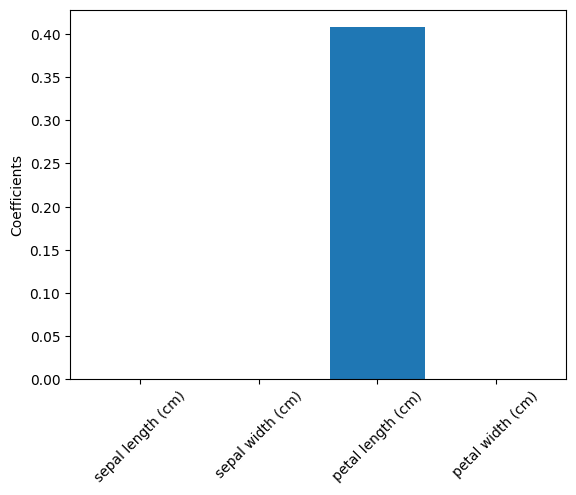

In [28]:
lasso = Lasso(alpha=0.1)
lasso_coef = lasso.fit(X, y).coef_

import matplotlib.pyplot as plt
plt.bar(names, lasso_coef)
plt.xticks(rotation=45)
plt.ylabel('Coefficients')
plt.show()